Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [66]:
#GITHUB LINK- https://github.com/Naamaalfasi/Best-Clustering--Silhouette-Method

In [2]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

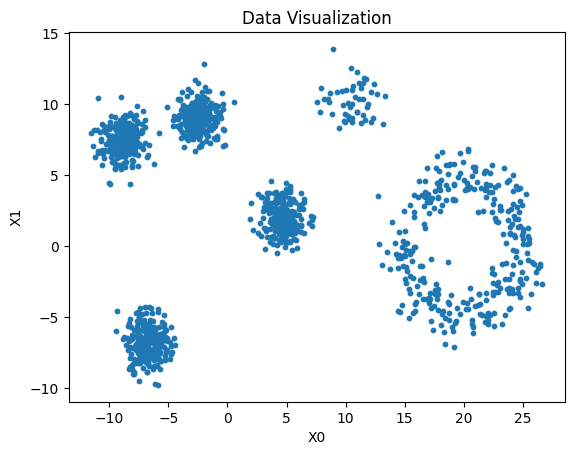

In [3]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data Visualization')
plt.show()



3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette

best_kmeans_score = -1
best_kmeans_params =2
kmeans_results = []

for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init= 10)
        kmeans.fit(X)
        label = kmeans.labels_
        score = silhouette_score(X, label)
        kmeans_results.append((score))
        if score > best_kmeans_score:
            best_kmeans_score = score
            best_kmeans_params = n_clusters

# Train K-Means
kmeans = KMeans(n_clusters=best_kmeans_params, random_state=42, n_init=10)
kmeans.fit(X)
label = kmeans.labels_

# חישוב מדד ה-Silhouette עבור KMeans

print(f"Silhouette Score for KMeans: {silhouette_score(X, label):}")
print(f"Optimal number of clusters: {best_kmeans_params}")


Silhouette Score for KMeans: 0.7251181630059241
Optimal number of clusters: 6


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [58]:
from sklearn.cluster import AgglomerativeClustering

# Train Agglomerative Clustering with best params
best_agg_params = {'n_clusters': 6, 'linkage': 'ward'}
agg = AgglomerativeClustering(n_clusters=best_agg_params['n_clusters'], linkage=best_agg_params['linkage'])
agg.fit(X)
agg_labels = agg.labels_

# Silhouette
agg_silhouette_score = silhouette_score(X, agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette_score:}")



Silhouette Score for Agglomerative Clustering: 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [60]:
from sklearn.cluster import DBSCAN

# Train DBSCAN with best params
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan.fit(X)
dbscan_labels = dbscan.labels_

# Silhouette
dbscan_silhouette_score = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score for Agglomerative Clustering: {dbscan_silhouette_score:}")

Silhouette Score for Agglomerative Clustering: 0.7222593187874933


6. Compare the results and choose the best method for the data


In [63]:
from sklearn.metrics import silhouette_score

# Silhouette Score for KMeans
kmeans_silhouette_score = silhouette_score(X, label)

# Silhouette Score for Agglomerative Clustering
agg_silhouette_score = silhouette_score(X, agg_labels)

# Silhouette Score for DBSCAN (only if there are more than one cluster)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(X, dbscan_labels)
else:
    dbscan_silhouette_score = -1  # Invalid score indicating poor clustering

print(f"Silhouette Score for KMeans: {kmeans_silhouette_score:}")
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette_score:}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_score:}")

# Determine the best method
if kmeans_silhouette_score > agg_silhouette_score and kmeans_silhouette_score > dbscan_silhouette_score:
    best_method = "KMeans"
elif agg_silhouette_score > kmeans_silhouette_score and agg_silhouette_score > dbscan_silhouette_score:
    best_method = "Agglomerative Clustering"
else:
    best_method = "DBSCAN"

print(f"The best clustering method is: {best_method}")



Silhouette Score for KMeans: 0.7251181630059241
Silhouette Score for Agglomerative Clustering: 0.7256900714288006
Silhouette Score for DBSCAN: 0.7222593187874933
The best clustering method is: Agglomerative Clustering


In [67]:
#The hyperparams check:

#FOR K MEANS-
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

#best_kmeans_score = -1
#best_kmeans_params = {}
#kmeans_results = []

#for n_clusters in range(2, 11):
#    for init_method in ['k-means++', 'random']:
#        kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=42)
#        kmeans.fit(X)
#        score = silhouette_score(X, kmeans.labels_)
#        kmeans_results.append((n_clusters, init_method, score))
#        if score > best_kmeans_score:
#            best_kmeans_score = score
#            best_kmeans_params = {'n_clusters': n_clusters, 'init': init_method}

#print(f'Best KMeans Params: {best_kmeans_params}')
#print(f'Best KMeans Silhouette Score: {best_kmeans_score:}')
#print('All KMeans Results:')
#for result in kmeans_results:
#    print(f'n_clusters: {result[0]}, init: {result[1]}, silhouette score: {result[2]:}')

#FOR Agglomerative Clustering-

#from sklearn.cluster import AgglomerativeClustering

#best_agg_score = -1
#best_agg_params = {}
#agg_results = []

#for n_clusters in range(2, 11):
#    for linkage in ['ward', 'complete', 'average', 'single']:
#        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
#        agg.fit(X)
#        score = silhouette_score(X, agg.labels_)
#        agg_results.append((n_clusters, linkage, score))
#        if score > best_agg_score:
#            best_agg_score = score

#print('All Agglomerative Clustering Results:')
#for result in agg_results:
#    print(f'n_clusters: {result[0]}, linkage: {result[1]}, silhouette score: {result[2]:}')


#FOR DBSCAN-

#from sklearn.cluster import DBSCAN

#best_dbscan_score = -1
#best_dbscan_params = {}
#dbscan_results = []

#eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
#min_samples_values = [5, 10, 15, 20]

#for eps in eps_values:
#    for min_samples in min_samples_values:
#        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#        dbscan.fit(X)
#        if len(set(dbscan.labels_)) > 1:  # Ensure there is more than one cluster
#            score = silhouette_score(X, dbscan.labels_)
#            dbscan_results.append((eps, min_samples, score))
#            if score > best_dbscan_score:
#                best_dbscan_score = score

#print('All DBSCAN Results:')
#for result in dbscan_results:
#    print(f'eps: {result[0]}, min_samples: {result[1]}, silhouette score: {result[2]:}')